# 課題K 一連の流れの実装になれよう
## 目的
    使用するデータセット : wine
    目的 : ワインの種類の判定

In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

## EDA

In [7]:
from sklearn.datasets import load_wine

wine = load_wine()
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
X = wine.data
y = wine.target

In [8]:
df = pd.DataFrame(X,columns=wine.feature_names)
df['class'] = y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


1    71
0    59
2    48
Name: class, dtype: int64


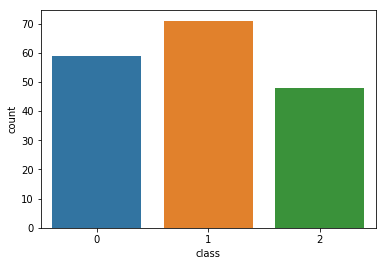

In [15]:
print(df['class'].value_counts())
sns.countplot(df["class"])

In [10]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [11]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


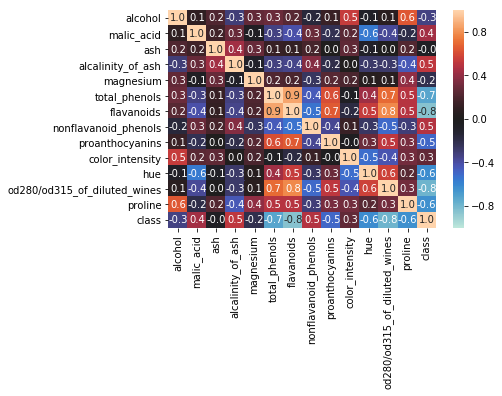

In [12]:
sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0, annot=True, fmt=".1f")

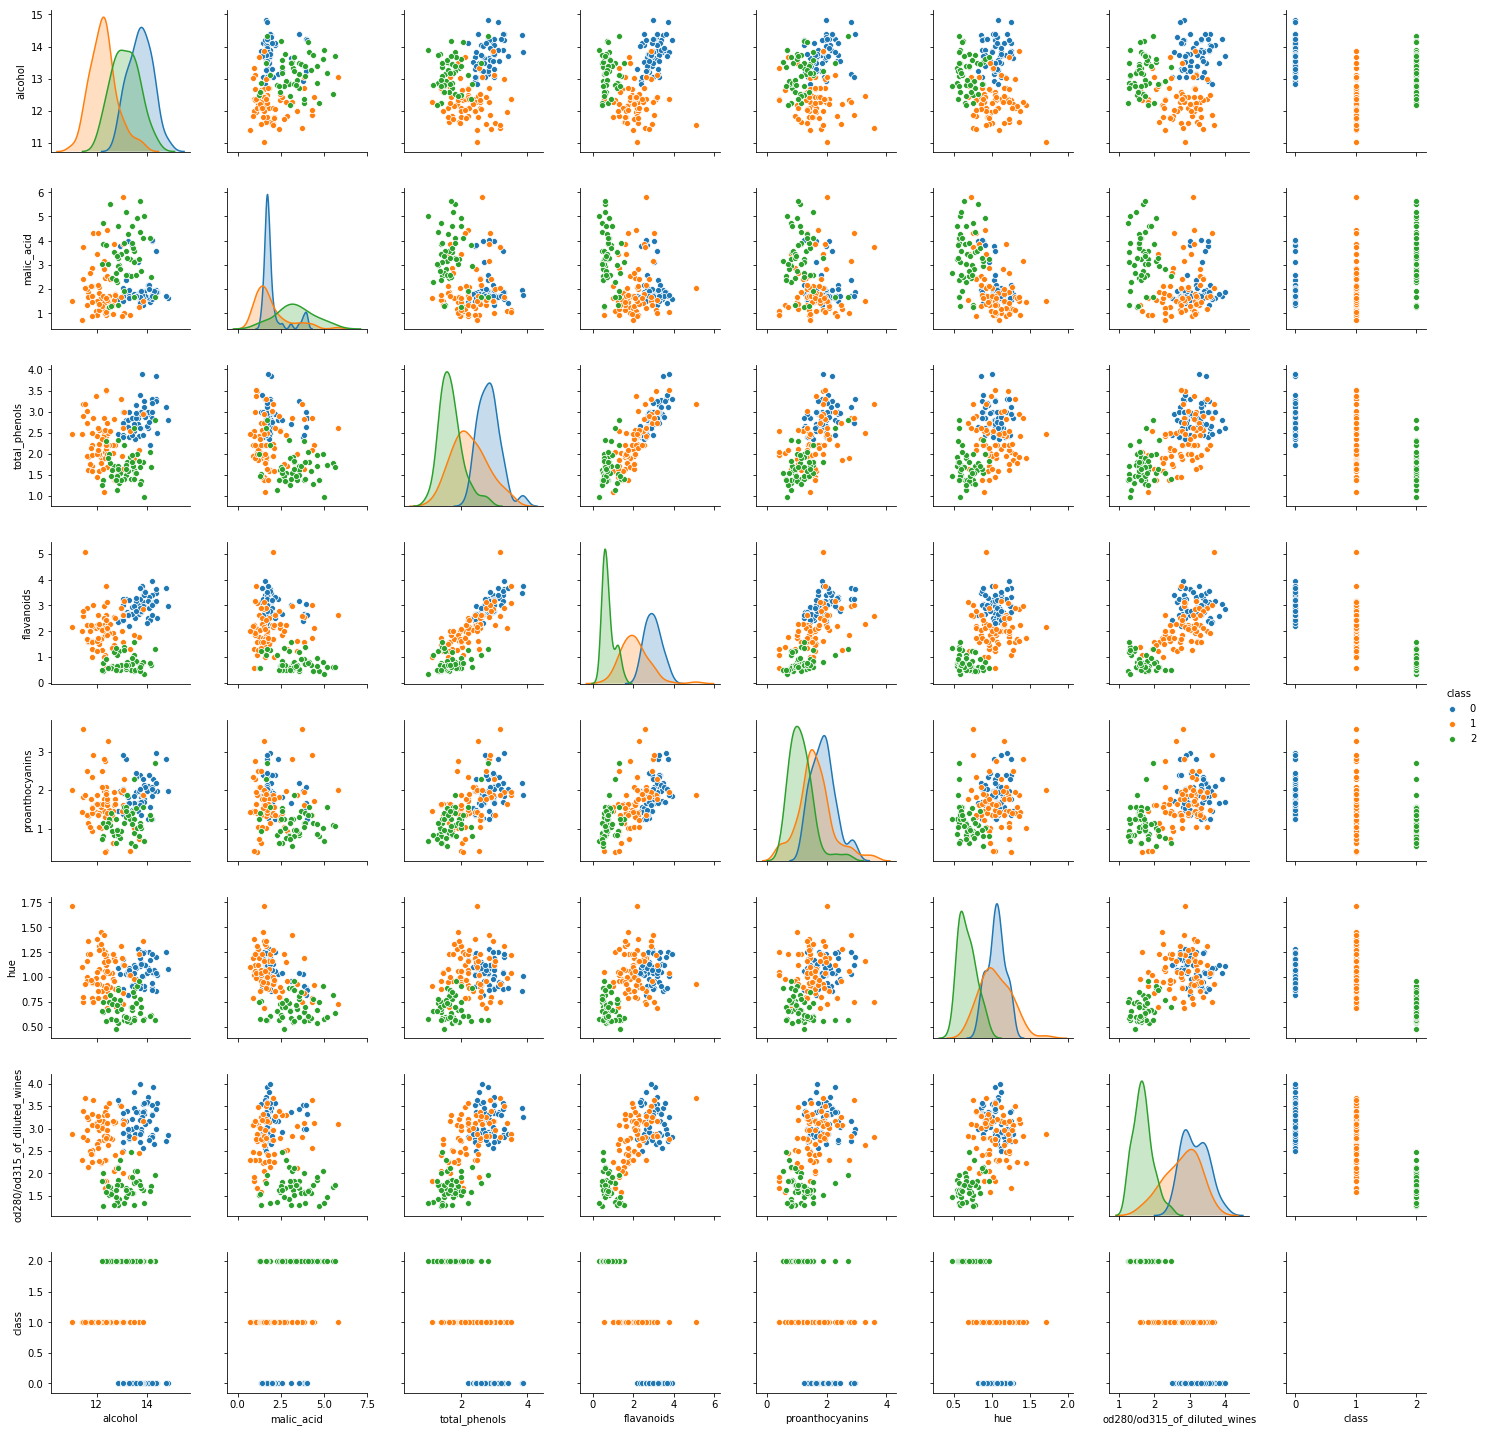

In [13]:
sns.pairplot(df[["alcohol", "malic_acid", "total_phenols","flavanoids","proanthocyanins","hue","od280/od315_of_diluted_wines","class"]],hue='class')

## 評価指標
**正答率を使用**

## 評価プロトコル
交差検証(5分割)
データの数に偏りがあるのでStratifiedKFoldを使用

## 機械モデルの訓練

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

K = 5

score_train = 0
score_test = 0

skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=0)


for train_index, test_index in skf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    logistic_regression = LogisticRegression()
    logistic_regression.fit(X_train,y_train)
    
    pred_train = logistic_regression.predict(X_train)
    
    auccuracy = accuracy_score(pred_train, y_train)
    score_train += auccuracy
    
    pred_test = logistic_regression.predict(X_test)
    auccuracy = accuracy_score(pred_test, y_test)
    
    score_test += auccuracy

print(f'train_score : {score_train / K : .3f}')
print(f'test_score : {score_test / K : .3f}')

train_score :  0.977
test_score :  0.960


## 機械モデルの改善とモデルの選択

十分な正答率を持っているがdfの項目を削って再度モデルを構築する
残すコラムは
 - alchol
 - total_phenols
 - flavanoids
 - hue
 - od280/od315_of_diluted_wines


In [37]:
X_new =  pd.DataFrame(X,columns=wine.feature_names)
X_new = X_new[['alcohol','total_phenols','flavanoids','hue','od280/od315_of_diluted_wines']]


score_train = 0
score_test = 0

skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=0)


for train_indeX_new, test_indeX_new in skf.split(X_new,y):
    X_new_train, X_new_test = X_new.iloc[train_indeX_new], X_new.iloc[test_indeX_new]
    y_train, y_test = y[train_indeX_new], y[test_indeX_new]
    
    logistic_regression02 = LogisticRegression()
    logistic_regression02.fit(X_new_train,y_train)
    
    pred_train = logistic_regression02.predict(X_new_train)
    
    auccuracy = accuracy_score(pred_train, y_train)
    score_train += auccuracy
    
    pred_test = logistic_regression02.predict(X_new_test)
    auccuracy = accuracy_score(pred_test, y_test)
    
    score_test += auccuracy

print(f'train_score : {score_train / K : .3f}')
print(f'test_score : {score_test / K : .3f}')

train_score :  0.830
test_score :  0.819


## 機械モデルの改善

データが減っており、正解率が低下している
そのため正規化を実行する

In [40]:
X_new =  pd.DataFrame(X,columns=wine.feature_names)
X_new = X_new[['alcohol','total_phenols','flavanoids','hue','od280/od315_of_diluted_wines']]


score_train = 0
score_test = 0

skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=0)


for train_indeX_new, test_indeX_new in skf.split(X_new,y):
    X_new_train, X_new_test = X_new.iloc[train_indeX_new], X_new.iloc[test_indeX_new]
    y_train, y_test = y[train_indeX_new], y[test_indeX_new]
    
    logistic_regression03 = LogisticRegression(C=10)
    logistic_regression03.fit(X_new_train,y_train)
    
    pred_train = logistic_regression03.predict(X_new_train)
    
    auccuracy = accuracy_score(pred_train, y_train)
    score_train += auccuracy
    
    pred_test = logistic_regression03.predict(X_new_test)
    auccuracy = accuracy_score(pred_test, y_test)
    
    score_test += auccuracy

print(f'train_score : {score_train / K : .3f}')
print(f'test_score : {score_test / K : .3f}')

train_score :  0.889
test_score :  0.870


終わり